In [1]:
# # 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabete_lgr_tr.csv
!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabete_lgr_te.csv

--2025-06-24 06:59:37--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabete_lgr_tr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16675 (16K) [text/plain]
Saving to: ‘diabete_lgr_tr.csv’

diabete_lgr_tr.csv  100%[===================>]  16.28K  --.-KB/s    in 0s      

2025-06-24 06:59:37 (81.4 MB/s) - ‘diabete_lgr_tr.csv’ saved [16675/16675]

--2025-06-24 06:59:37--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabete_lgr_te.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

# Logistic Regression Model

In [3]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
install_and_import(['mlxtend'])


mlxtend is already installed.


In [4]:
## 필요 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS ## sklearn 하고 이름은 같으나 다름
from sklearn.metrics import accuracy_score


# 데이터 읽기

- Pima Indians Diabetes 데이터셋
  - Pregnancies(preg): 임신 횟수
  - Glucose(plas): 포도당 부하 검사에서의 혈장 포도당 농도 (mg/dL)
  - BloodPressure(pres): 이완기 혈압 (mm Hg)
  - SkinThickness(skin): 삼두근 피부 주름 두께 (mm)
  - Insulin(insu): 2시간 혈청 인슐린 (mu U/ml)
  - BMI(mass): 체질량 지수 (체중(kg)/(신장(m))^2)
  - DiabetesPedigreeFunction(pedi): 당뇨병 가족력 함수 (당뇨병 가족력에 따른 위험도)
  - Age(age): 나이 (년)
  - Outcome(class): 클래스 변수 (0 = 당뇨병 없음, 1 = 당뇨병)

- 1세 이상의 Pima 인디언 여성들의 의료 기록으로 구성
- 변수들을 사용하여 당뇨병 발병 여부를 예측하는 것이 목표임

In [5]:
rd = pd.read_csv('diabete_lgr_tr.csv')
rd

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0,129,80,0,0,31.2,0.703,29,0
1,3,88,58,11,54,24.8,0.267,22,0
2,7,150,78,29,126,35.2,0.692,54,1
3,0,134,58,20,291,26.4,0.352,21,0
4,1,83,68,0,0,18.2,0.624,27,0
...,...,...,...,...,...,...,...,...,...
532,0,132,78,0,0,32.4,0.393,21,0
533,1,119,44,47,63,35.5,0.280,25,0
534,4,131,68,21,166,33.1,0.160,28,0
535,2,111,60,0,0,26.2,0.343,23,0


## 종속 변수 확인

In [6]:
##  'class' 변수 범주형으로 변경
rd['class'] = rd['class'].astype('category')


In [7]:
## Logistic regression model
X = rd.drop(columns=['class'])

X = sm.add_constant(X)  # 상수항을 모델에 넣어줘야 함 Adds a constant term to the predictor!!

y = rd['class']

## 로지스틱 모델 적합

### 모델 적합

In [8]:
## statsmodels 사용!!
model_sm = sm.Logit(exog = X, # 독립변수
                                             endog = y,) # 종속변수
result_sm = model_sm.fit()

# Summary of the model
print(result_sm.summary())


Optimization terminated successfully.
         Current function value: 0.479288
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                  0.2529
Time:                        06:59:45   Log-Likelihood:                -257.38
converged:                       True   LL-Null:                       -344.51
Covariance Type:            nonrobust   LLR p-value:                 1.639e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0064      0.822     -9.737      0.000      -9.618      -6.395
preg           0.1108      0.

### 결과 해석1
- overview:
  - 로지스틱 회귀 모델의 경우, R2 및 (adjusted R2)는 일반적으로 사용X
  -  R2 및 adj R2 는 주로 선형 회귀 모델에서 사용
  -  로지스틱 회귀 모델에서는 대안적인 적합도 평가 지표를 사용(로그-유사도(log-likelihood) 및 pseudo R2)
  - 로지스틱에서는 **주로 새로운(테스트) 데이터에 대한 정확도**로 모델 평가
  

- 모델 적합도
  - Pseudo R-squared: 0.2529 - 모델이 종속 변수 변동의 약 25.29%를 설명
  - Log-Likelihood: -257.38 - 로그 가능도 값은 모델의 적합도를 나타냄
  - LL-Null: -344.51 - 기본 모델의 로그 가능도 값임
  - LLR p-value: 1.639e-33 - 모델의 유의성, 매우 작은 값이므로 모델이 유의미함
- 변수별 회귀 계수 및 유의성
  - const (절편): -8.0064 - 절편의 p-value가 0.000으로 매우 유의미
  - preg (임신 횟수): 0.1108 - p-value가 0.003으로 유의미하며, 임신 횟수가 증가할수록 당뇨병 발생 확률이 증가
  - plas (혈장 포도당 농도): 0.0310 - p-value가 0.000으로 매우 유의미하며, 혈장 포도당 농도가 증가할수록 당뇨병 발생 확률이 증가
  - pres (혈압): -0.0149 - p-value가 0.009로 유의미하며, 혈압이 증가할수록 당뇨병 발생 확률이 감소
  - skin (피부 두께): -0.0007 - p-value가 0.927로 유의미하지 않음
  - insu (인슐린 농도): -0.0017 - p-value가 0.103으로 유의미하지 않음
  - mass (체질량 지수): 0.1008 - p-value가 0.000으로 매우 유의미하며, 체질량 지수가 증가할수록 당뇨병 발생 확률이 증가
  - pedi (당뇨병 계통 기능): 0.9019 - p-value가 0.011로 유의미하며, 당뇨병 계통 기능 값이 높을수록 당뇨병 발생 확률이 증가
  - age (나이): 0.0138 - p-value가 0.208로 유의미하지 않음
- 요약
  - 혈장 포도당 농도, 임신 횟수, 혈압, 체질량 지수, 당뇨병 계통 기능 등이 중요한 요인
  - 피부 두께, 인슐린 농도, 나이는 유의미하지 않은 변수로 추정됨

### 결과 해석2
- 모델이 전체 변동을 많이 설명못하지만..모델 자체는 유의미 한 경우
  - 1. 변수가 유의미할 때
    - 모델의 개별 독립 변수들이 통계적으로 유의미한 경우, 모델 전체의 설명력이 낮더라도 중요한 통찰을 제공할 수 있음.
    - 예:특정 변수들이 종속 변수와 강한 관계가 있음을 나타내는 경우임
  - 2. 모델의 유의성 테스트 (LLR p-value)가 매우 낮을 때(LLR: 로그 우도 레시오)
    - 모델의 로그 가능도 비율 테스트(LLR p-value)가 매우 낮아 모델이 유의미함을 나타내는 경우, 설명력이 낮더라도 모델이 종속 변수와 독립 변수 간의 관계를 의미 있게 설명하고 있다고 판단할 수도 있음..
  - 3. 변동의 일부만 설명해도 실용적일 때
    - 설명력이 낮더라도 실제 응용에서 유용할 수도 있음  
    - 예) 의료 진단에서 특정 위험 요인을 식별하여 환자를 모니터링하거나 조기 경고 시스템을 만드는 데 사용할 수 있음.   
    - 설명력이 낮더라도 중요한 인사이트를 제공해 의사결정에 도움을 줄 수 있음
  - 4. 다른 모델과 비교할 때 유의미할 때
    - 다른 모델들과 비교했을 때 상대적으로 더 나은 성능을 보일 때, 설명력이 낮더라도 유의미하다고 할 수 있음
    - 예시:) 다른 모델들보다 더 높은 설명력이나 더 좋은 예측 성능을 보일 수 있음
  - 5. 데이터의 특성
    - 사회과학, 경제학, 심리학 등의 연구에서는 설명력이 낮아도 유의미한 결과로 간주될 수 있음
    - 많은 외부 요인들이 영향을 미치는 분야에 따라서는 R2 값이 상대적으로 낮게 나올 수도 있음
    - 이때 변수 간의 관계가 유의미하다면 중요한 발견으로 여겨질 수 있음

### 회귀식 만들기

In [9]:
## 회귀식 만들기
coefficients = result_sm.params

# 회귀식 생성
logit_equation = f"log(p / (1 - p)) = {coefficients.iloc[0]:.4f}"
for i in range(1, len(coefficients)):
    logit_equation += f" + ({coefficients.iloc[i]:.4f} * {X.columns[i]})"

print("\nLogistic Regression Equation:")
print(logit_equation)


Logistic Regression Equation:
log(p / (1 - p)) = -8.0064 + (0.1108 * preg) + (0.0310 * plas) + (-0.0149 * pres) + (-0.0007 * skin) + (-0.0017 * insu) + (0.1008 * mass) + (0.9019 * pedi) + (0.0138 * age)


In [10]:
## 오즈 비 계산
# Odds Ratios
odds_ratios = np.exp(result_sm.params)
print("Odds Ratios:\n",
      odds_ratios,
      sep = '') # 첫줄 space 방지..



Odds Ratios:
const    0.000333
preg     1.117129
plas     1.031520
pres     0.985243
skin     0.999257
insu     0.998274
mass     1.106045
pedi     2.464335
age      1.013884
dtype: float64


#### 변수 선택법 적용


In [11]:
## sklearn 사용, statsmodels도 사용은 가능
log_reg = LogisticRegression(max_iter=10000, solver='liblinear')

## 전진 선택법 적용
sfs = SFS(log_reg,
          k_features = 'best',
          forward = True,
          floating = False, ## True 이면 각 단계에서 변수를 추가하거나 제거할 때, 이전에 선택/제거된 변수들도 재고려한다는 의미
          scoring =  'r2',
          cv = 0, # cv > 1 이면, 여러번 반복해서 더 정확하게 추정 가능 보통 5, 10 사용
          verbose = 2)

sfs = sfs.fit(X, y)


## 선택된 변수들
selected_features = list(sfs.k_feature_names_)
selected_features

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2025-06-24 06:59:45] Features: 1/9 -- score: -0.1605075483930718[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2025-06-24 06:59:46] Features: 2/9 -- score: -0.07761415207928102[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2025-06-24 06:59:46] Features: 3/9 -- score: -0.011299435028248261[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2025-06-24 06:59:46] Features: 4/9 -- score: -0.027878114291006506[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2025-06-24 06:59:46] Features: 5/9 -- score: -0.011299435028248261[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2025-06-24 06:59:46] Features: 6/9 -- score: 0.005279244234509872[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2025-06-24 06:59:46] Features: 7/9 -- score: -0.019588774659627273[Parallel(n_jobs=1)]: Done   2 out of 

['const', 'plas', 'pres', 'skin', 'mass', 'pedi']

In [12]:
## 변수 선택법 적용시 회귀계수 확인
X_selected = X[selected_features]
final_model_lr = LogisticRegression(max_iter=10000,
                                 solver='liblinear')
final_model_lr.fit(X_selected, y)


## 회귀 계수와 변수명 정리
coefficients = final_model_lr.coef_[0]  # 로지스틱 회귀는 다중 클래스가 아닌 경우 하나의 계수 배열을 반환
intercept = final_model_lr.intercept_[0]

## 데이터프레임으로 정리
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
})

coef_df



,Feature,Coefficient
0,const,-2.839996
1,plas,0.026096
2,pres,-0.012162
3,skin,-0.007711
4,mass,0.076225
5,pedi,0.644515


In [13]:
## statsmodels 사용!!
model_sm_sel = sm.Logit(exog = X_selected,# 독립변수
                       endog = y) # 종속변수
final_result_sm = model_sm_sel.fit()

# Summary of the model
print(final_result_sm.summary())


Optimization terminated successfully.
         Current function value: 0.501343
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      531
Method:                           MLE   Df Model:                            5
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                  0.2185
Time:                        06:59:46   Log-Likelihood:                -269.22
converged:                       True   LL-Null:                       -344.51
Covariance Type:            nonrobust   LLR p-value:                 1.002e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1326      0.751     -9.494      0.000      -8.605      -5.660
plas           0.0301      0.

### 오즈비와 신뢰구간 차팅(참고)

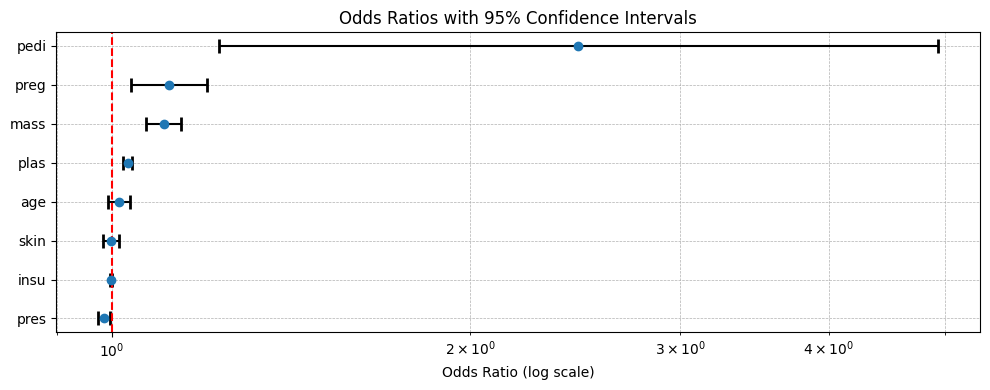

In [14]:
## 오즈비와 신뢰구간 계산 based on the statsmodels

## 전체 변수 사용시
conf_int = np.exp(result_sm.conf_int())
odds_ratios = np.exp(result_sm.params)

## 변수 선택시
# conf_int = np.exp(final_result_sm.conf_int())
# odds_ratios = np.exp(final_result_sm.params)

## 데이터프레임 생성
odds_df = pd.DataFrame({
    'OR': odds_ratios,
    'Lower CI': conf_int[0],
    'Upper CI': conf_int[1]
})

## 상수항 제거 (있다면)
if 'const' in odds_df.index:
    odds_df = odds_df.drop('const')

## 플롯 생성
fig, ax = plt.subplots(figsize=(10, len(odds_df) * 0.5))

## 오즈비와 신뢰구간 플로팅
odds_df = odds_df.sort_values('OR')
y_pos = np.arange(len(odds_df))
ax.errorbar(odds_df['OR'], y_pos,
            xerr = [odds_df['OR'] - odds_df['Lower CI'],
                    odds_df['Upper CI'] - odds_df['OR']],
            fmt = 'o', capsize = 5, capthick = 2, ecolor = 'black')

## y축 레이블 설정
ax.set_yticks(y_pos)
ax.set_yticklabels(odds_df.index)

## x축을 로그 스케일로 설정
ax.set_xscale('log')

## 1인 지점에 수직선 추가 (오즈비가 1인 경우 효과 없음을 의미함!)
ax.axvline(x = 1, color = 'red', linestyle = '--')

## 레이블과 제목 추가
ax.set_xlabel('Odds Ratio (log scale)')
ax.set_title('Odds Ratios with 95% Confidence Intervals')

## 그리드 추가
ax.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

## 플롯 표시
plt.tight_layout()
plt.show()

- 오즈비가 1보다 크면 해당 변수의 값이 증가할 때 종속 변수(예: 질병 발생)의 오즈가 증가한다는 의미
- 오즈비가 1보다 작으면 해당 변수의 값이 증가할 때 종속 변수의 오즈가 감소한다는 의미
- 오즈비가 1이면 해당 변수의 값이 종속 변수의 오즈에 영향을 미치지 않는다는 의미

- 신뢰구간 (Confidence Interval)
  - 각 점은 해당 변수의 오즈비를 나타내고, 수평선은 95% 신뢰구간
  - 신뢰구간이 1을 포함하지 않으면 해당 변수는 통계적으로 유의미
  - 신뢰구간이 1을 포함하면 해당 변수는 통계적으로 유의미하지 않을 수 있음
- 수직선 (1의 지점)
  - x축에 있는 수직선(빨간색 점선)은 오즈비가 1인 지점
  - 오즈비가 1보다 크면 긍정적인 효과를, 1보다 작으면 부정적인 효과를 의미

## 새로운 데이터에 대해 적용해보기

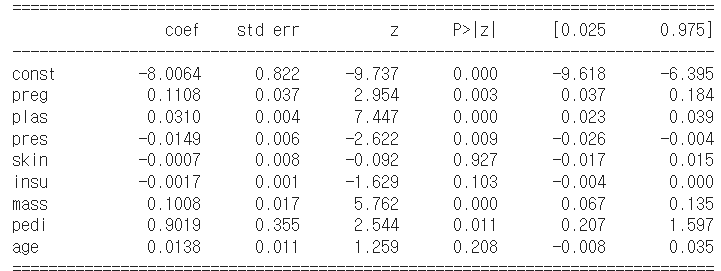

In [15]:
## Predicting probabilities for a new patient
patient1 = pd.DataFrame({
    'const': 1,
    'preg': [4],
    'plas': [50],
    'pres': [80],
    'skin': [30],
    'insu': [20],
    'mass': [75],	 ##
    'pedi': [0.8],
    'age': [35]
})

pred_prob_patient1 = result_sm.predict(patient1)
print("환자 1의 당뇨병 예측 확률:", pred_prob_patient1[0])

환자 1의 당뇨병 예측 확률: 0.8183950934837545


### 변수 1단위 올라 갔을때..

In [16]:
patient1_mass76 = patient1.copy()
patient1_mass76['mass'] = 76

### statsmodels
## statsmodels 사용!!

## 로짓 계산
logit_patient1_mass75 = result_sm.predict(patient1,
                                          which = "linear")[0] ## 로짓 출력시 which="linear"
logit_patient1_mass76 = result_sm.predict(patient1_mass76,
                                          which = "linear")[0]

print("logit_patient1_mass75:", logit_patient1_mass75)
print("logit_patient1_mass76:", logit_patient1_mass76)

logit_patient1_mass75: 1.5055117353015208
logit_patient1_mass76: 1.6063020619064203


### 오즈 변화 확인

In [17]:
## 로지스틱 회귀: 𝑳𝒐𝒈𝒊𝒕(로그오즈)은 𝜷만큼 변화 (오즈비는 𝒆^𝜷 만큼 변화)
## 로그오즈(로짓) 변화
logit_diff7675 = logit_patient1_mass76 - logit_patient1_mass75
logit_diff7675

np.float64(0.1007903266048995)

In [18]:
## The change in odds where the event will occur is
## 오즈비 변화 (오즈비는 𝒆^𝜷 만큼 변화)
## np.exp(1) ## 오일러 상수 or 자연로그의 밑, 통칭 e

odds_ratio_7675 = np.exp(logit_diff7675) # e^beta
odds_ratio_7675

np.float64(1.106044709299908)

In [19]:
### 개별 오즈 계산
## odds_75
odds_75 = np.exp(logit_patient1_mass75)
print(odds_75)

## odds_76
odds_76 = np.exp(logit_patient1_mass76)
print(odds_76) # = odds_75 * np.exp(coef_of_mass) #

## odds_diff
odds_diff = odds_76/odds_75
print("odds_diff:", odds_diff)

4.506459154563343
4.984345305580921
odds_diff: 1.1060447092999077


In [20]:
## mass의 회귀 계수로 계산하기
coef_of_mass = result_sm.params[result_sm.params.index == 'mass'].values[0] #
print("coef_of_mass:", coef_of_mass)
print('e ^ beta:', np.exp(coef_of_mass))

coef_of_mass: 0.10079032660489938
e ^ beta: 1.1060447092999077


In [21]:
pred_prob_patient1_76 = result_sm.predict(patient1_mass76)
print("환자 1의 + mass 76 당뇨병 예측 확률:", pred_prob_patient1_76[0])

환자 1의 + mass 76 당뇨병 예측 확률: 0.8328973431617636


### 여러개 데이터에 대해서 적용

In [22]:
## Predicting probabilities for a test set
patient2 = pd.read_csv('diabete_lgr_te.csv')

X_test = patient2.drop(columns=['class'])
X_test = sm.add_constant(X_test)  # Adds a constant term to the predictor
y_test = patient2['class']

## 개별 환자에 대한 확률 값 계산
pred_prob = result_sm.predict(X_test)
pred_prob

,0
0,0.055433
1,0.880567
2,0.536215
3,0.381089
4,0.436319
...,...
226,0.681580
227,0.423524
228,0.089604
229,0.338149


In [23]:
## 0,1 분류, 기본 threshold = 0.5
pred_class = (pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, pred_class)
print("Accuracy at 0.5 threshold:", accuracy) ## 정확도 계산

Accuracy at 0.5 threshold: 0.7965367965367965


### 0,1 로 만들기


In [24]:
## 값이 0.5보다 크면 1로, 아니면 0으로 변환
def make_binary(value, threshold = 0.5):
    output = (value > threshold).astype(int)
    return output

pred_class = make_binary(pred_prob > 0.5)
pred_class

,0
0,0
1,1
2,1
3,0
4,0
...,...
226,1
227,0
228,0
229,0


In [25]:
## 확률값과, 예측 값
result_df =  pd.DataFrame({'pred_prob': pred_prob, # 예측 확률값
                            'pred_class': pred_class, # 예측 클래스 값
                            'class_true': y_test}) # 정답
result_df

,pred_prob,pred_class,class_true
0,0.055433,0,0
1,0.880567,1,1
2,0.536215,1,1
3,0.381089,0,1
4,0.436319,0,0
...,...,...,...
226,0.681580,1,1
227,0.423524,0,1
228,0.089604,0,0
229,0.338149,0,0


In [26]:
## 정확도 계산
accuracy = (result_df['pred_class'] == result_df['class_true']).mean()
print('정확도:', accuracy)

정확도: 0.7965367965367965


### (참고)threshold 바꿀때 결과 확인

In [27]:
## 5. Finding the optimal cut-off threshold
thresholds = np.arange(0.1, 1.0, 0.1)
accuracy_list = []

for threshold in thresholds:
    pred_class = (pred_prob > threshold).astype(int)
    accuracy = accuracy_score(y_test, pred_class) ## 정확도 계산
    accuracy_list.append((threshold, accuracy))
    print(f"Threshold: {threshold}, Accuracy: {accuracy}")

## Find the threshold with the highest accuracy
optimal_threshold = max(accuracy_list, key=lambda x: x[1])

print("Optimal threshold:", optimal_threshold[0],
      "with accuracy:", optimal_threshold[1])

Threshold: 0.1, Accuracy: 0.5238095238095238
Threshold: 0.2, Accuracy: 0.6796536796536796
Threshold: 0.30000000000000004, Accuracy: 0.7489177489177489
Threshold: 0.4, Accuracy: 0.8138528138528138
Threshold: 0.5, Accuracy: 0.7965367965367965
Threshold: 0.6, Accuracy: 0.7878787878787878
Threshold: 0.7000000000000001, Accuracy: 0.7402597402597403
Threshold: 0.8, Accuracy: 0.6926406926406926
Threshold: 0.9, Accuracy: 0.6406926406926406
Optimal threshold: 0.4 with accuracy: 0.8138528138528138


- 로지스틱 회귀에서 임계값(threshold)을 0.5보다 크게 하거나 작게 해야 하는 상황
  - 임계값을 0.5보다 작게 하는 경우  
    - 실제 양성(False Negative)을 놓치면 안 되는 경우:
      - 암 검진에서는 암 환자를 놓치는 것이 매우 위험함
      - 따라서 임계값을 낮춰 더 많은 사람을 양성(암 환자)으로 분류함

    - 재현율(Recall)이 중요한 경우:
      - 재현율은 실제 양성 중에서 모델이 맞게 예측한 비율
      - 재현율을 높이기 위해 임계값을 낮출 수 있음..

  - 임계값을 0.5보다 크게 하는 경우
    - 실제 음성(False Positive)을 잘못 양성으로 분류하면 안 되는 경우:  
      - 스팸 필터에서는 정상 이메일을 스팸으로 잘못 분류하면 안 됨
      - 따라서 임계값을 높여 더 많은 이메일을 음성(정상)으로 분류

    - 정밀도(Precision)가 중요한 경우:
      - 정밀도는 모델이 양성으로 예측한 것 중 실제로 양성인 비율
      - 정밀도를 높이기 위해 임계값을 높일 수 있음